## Подключаю библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, LearningCurveDisplay

## Объяснение колонок

Возраст (Age) - Возраст пациента. (Числовой)

Пол (Gender) - пол пациента. (Категориальный) 

Все значения варьируются по тяжести воздействия на пациента или у пациента. Где 1 - всё хорошо, а максимальное значение - ужасно.

Загрязнение воздуха (Air Pollution) - Уровень воздействия загрязнения воздуха на пациента. (Категориальный) (1 - 8)

Употребление алкоголя (Alcohol use) - Уровень употребления алкоголя пациентом. (Категориальный) (1 - 8)

Аллергия на пыль (Dust Allergy) - Уровень аллергии на пыль у пациента. (Категориальный) (1 - 8)

Профессиональные опасности (OccuPational Hazards) - уровень профессиональных опасностей пациента. (Категориальный) (1 - 8)

Генетический риск (Genetic Risk) - уровень генетического риска пациента. (Категориальный) (1 - 7)

Хроническое заболевание легких (Chronic Lung Disease) - Уровень хронического заболевания легких у пациента. (Категориальный) (1 - 7)

Сбалансированное питание (Balanced Diet) - уровень сбалансированного питания пациента. (Категориальный) (1 - 7)

Ожирение (Obesity) - уровень ожирения пациента. (Категориальный) (1 - 7)

Курение (Smoking) - уровень курения пациента. (Категориальный) (1 - 8)

Пассивный курение (Passive Smoker) - Уровень пассивного курения пациента. (Категориальный) (1 - 8)

Боль в груди (Chest Pain) - Уровень боли в груди пациента. (Категориальный) (1 - 9)

Кашель с кровью (Coughing of Blood) - Уровень кашля с кровью пациента. (Категориальный) (1 - 9)

Усталость (Fatigue) - Уровень утомления пациента. (Категориальный) (1 - 9)

Потеря веса (Weight Loss) - Уровень снижения веса пациента. (Категориальный) (1 - 8)

Одышка (Shortness of Breath) - уровень одышки пациента. (Категориальный) (1 - 9)

Сопение (Wheezing) - Уровень сопения пациента. (Категориальный) (1 - 8)

Затруднение глотания (Swallowing Difficulty) - Уровень затруднения глотания пациента. (Категориальный) (1 - 8)

Загибание ногтей (Clubbing of Finger Nails) - Уровень изменения в областях под и вокруг ногтей пальцев рук. (Категориальный) (1 - 9)

Простудные заболевания (Frequent Cold) - Уровень частот простудных заболеваний. (Категориальный) (1 - 7)

Сухой кашель (Dry Cough) - Уровень кашля (сухого). (Категориальный) (1 - 7)

Храп (Snoring) - Уровень храпа пациента. (Категориальный) (1 - 7)

Рак (Level) - Шанс рака лёгких. (Категориальный)

## Загрузка и обработка

Загружаю данные, на которых будет проведено обучение

In [2]:
df_canser = pd.read_csv("cancer_patient_data_sets.csv")
df_canser.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,male,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,male,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,male,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,male,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,male,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


Проверяю загрузку

In [3]:
df_canser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   object
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

Данные успешно загружены, нули отсутствуют

In [4]:
print(f"Дубликаты: {df_canser.duplicated().sum()}")

Дубликаты: 0


Дубликаты отсутствуют

# Кодирование

Создаю копию без колонки с ID пользователя, так как она не несёт практической информации для нашей задачи

In [55]:
df_canser1 = df_canser.drop("Patient Id", axis=1)

Создаю собственный класс, для кодировки в заданном порядке

Создаю список с правильно расположенными элементами для кодировки

In [56]:
level_list=["Low", "Medium", "High"]

Кодирую пол и шанс рака

In [57]:
gender_le = LabelEncoder()
level_che = LabelEncoder()

gender_le.fit(df_canser1["Gender"])
level_che.fit(level_list)

LabelEncoder()

In [58]:
print(gender_le.classes_)
print(level_che.classes_)

['female' 'male']
['High' 'Low' 'Medium']


Кодирую данные

In [59]:
df_canser1["Gender"] = gender_le.transform(df_canser1["Gender"])
df_canser1["Level"] = level_che.transform(df_canser1["Level"])
df_canser1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

Данные успешно закодированы

Смотрю, в каких столбцах есть выбросы

In [60]:
outlier_cols = []

for column in df_canser1.columns:
    Q1 = df_canser1[column].quantile(0.25)
    Q3 = df_canser1[column].quantile(0.75)
    IQR = Q3 - Q1

    outliers = (df_canser1[column] < Q1 - 1.5 * IQR) | (df_canser1[column] > Q3 + 1.5 * IQR)

    if any(outliers):
        outlier_cols.append(column)

print("Columns with outliers:", outlier_cols)

Columns with outliers: ['Age']


Выбросы есть в столбце с возрастом, но это даже звучит нелогично, поэтому проверка

In [61]:
df_canser1.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,37.174000,0.598000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,0.96700
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.83463
min,14.000000,0.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000
25%,27.750000,0.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.00000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.00000
75%,45.000000,1.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.00000
max,73.000000,1.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.00000


В возрасте значения удовлетворительные, поэтому мы его не трогаем

## Проверка корреляции и кластеризация

Создаю функцию для вывода таблицы корреляции по целевому признаку

In [62]:
def corrmap(df, target, *, annot=True):
    plt.figure(figsize=(15,7))
    sns.heatmap(df.corr().drop(df.columns[df.columns != target], axis=1), annot=annot)

Вывожу корреляцию значений к шансу рака

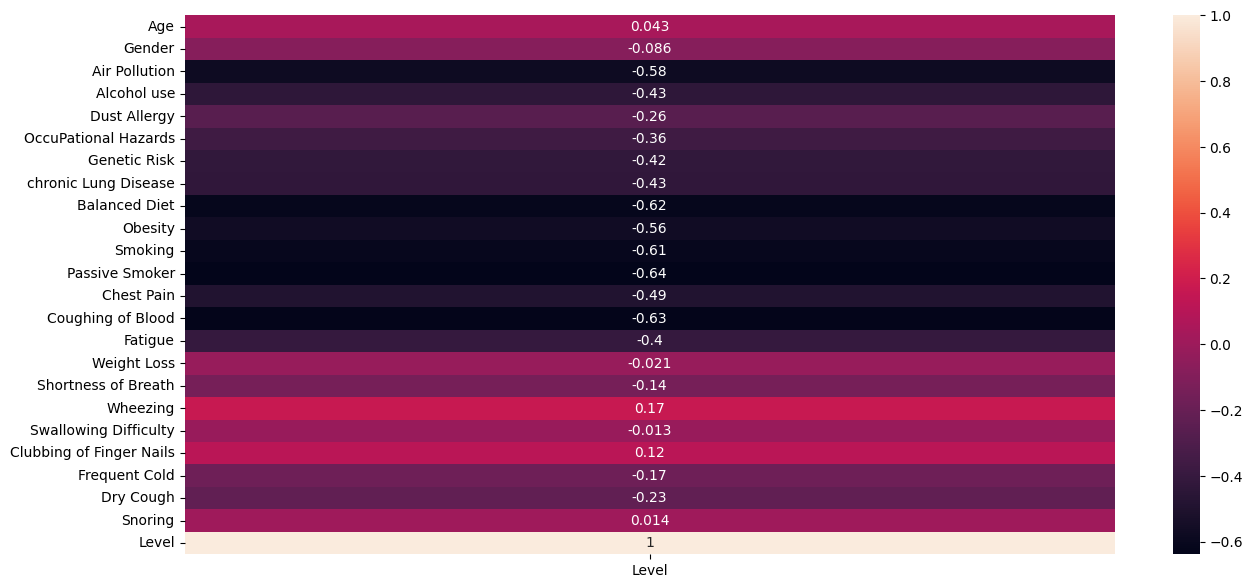

In [63]:
corrmap(df_canser1, "Level")

Все значения прекрасно коррелируют

Функции для понижения размерности, использования метода локтя и кластеризации методом K-Means

In [64]:
def pca2(df):
    # Масштабирую данные
    ssc = StandardScaler()
    ddf = ssc.fit_transform(df)

    # Нормализирую данные
    norm = Normalizer()
    ddt = norm.fit_transform(ddf)
    from sklearn.decomposition import PCA


    # Уменьшаем размерность при помощи метода главных компонент
    pca = PCA(n_components=2).fit(ddt)
    pca_2d = pca.transform(ddt)
    return pca_2d

def elbow(pca_2d):
    sse = []
    # Смотрю, какая сумма квадратов расстояния для разного кол-ва класстеров
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(pca_2d)
        sse.append(kmeans.inertia_)
    # Изображаю график метода Локтя
    plt.plot(range(1, 11), sse, marker='o')
    plt.title('Метод „Локтя“')
    plt.xlabel('Количество кластеров')
    plt.ylabel('Сумма квадратов расстояний')
    plt.show()

list_of_color = ["red", "blue", "green", "orange", "black", "yellow"]

def KMN(df, pca_2d, n_clusters):
    # Обучаю и предсказываю кластеры по уже известному их кол-ву
    km = KMeans(n_clusters=n_clusters, random_state=0, init = 'k-means++')
    all_pred = km.fit_predict(pca_2d)
    # Визуализирую кластеры
    for k in range(n_clusters):
        plt.scatter(pca_2d[all_pred==k].T[0] , pca_2d[all_pred==k].T[1], color=list_of_color[k])
        
    plt.title(f'Кластеризация KMeans')
    plt.show()
    # Описываю характеристики по каждому столбцу каждого кластера и собираю эти характеристики в список
    for i in range(n_clusters):
        print(f"{i+1} кластер. Кол-во: {km.labels_[km.labels_==i].size}\n")
        print(f"Цвет: {list_of_color[i]}\n")
        for j in df.columns[2:]:
            print(f"Среднее {j}: {df[j][km.labels_==i].mean():.3f}")
            # print(f"Min {j}: {df[j][km.labels_==i].min():.3f}\nMax {j}: {df[j][km.labels_==i].max():.3f}\n\n")
        print()
    return km.labels_


Убираю колонку с шансом рака, так как она не должна присутствовать в кластеризации

In [65]:
df_level_drop = df_canser1.drop(["Level"], axis=1)

Понижаю размерность

In [66]:
pca_2d = pca2(df_level_drop)

Использую метод локтя для поиска оптимального кол-ва кластеров

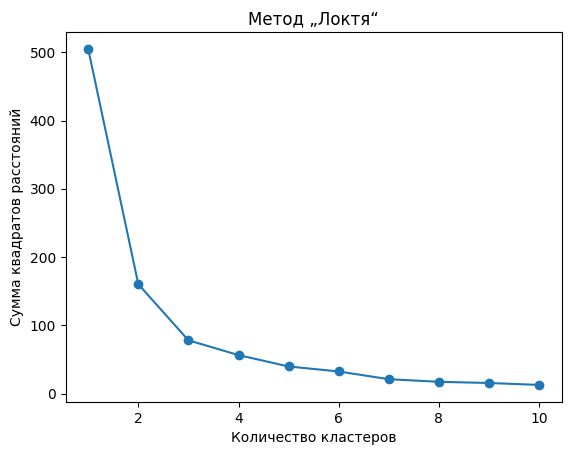

In [67]:
elbow(pca_2d)

Оптимальное кол-во кластеров - 3, так как после 3 сумма квадратов растояний не слишком сильно уменьшается

In [68]:
n_clust = 3

Кластеризация

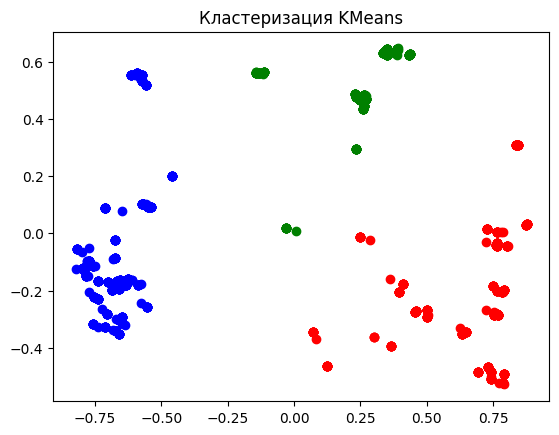

1 кластер. Кол-во: 375

Цвет: red

Среднее Air Pollution: 5.328
Среднее Alcohol use: 6.888
Среднее Dust Allergy: 6.733
Среднее OccuPational Hazards: 6.813
Среднее Genetic Risk: 6.632
Среднее chronic Lung Disease: 6.152
Среднее Balanced Diet: 6.709
Среднее Obesity: 6.291
Среднее Smoking: 6.472
Среднее Passive Smoker: 6.648
Среднее Chest Pain: 7.048
Среднее Coughing of Blood: 7.107
Среднее Fatigue: 4.480
Среднее Weight Loss: 3.469
Среднее Shortness of Breath: 4.387
Среднее Wheezing: 4.048
Среднее Swallowing Difficulty: 4.264
Среднее Clubbing of Finger Nails: 3.883
Среднее Frequent Cold: 3.597
Среднее Dry Cough: 3.955
Среднее Snoring: 3.248

2 кластер. Кол-во: 435

Цвет: blue

Среднее Air Pollution: 2.395
Среднее Alcohol use: 1.908
Среднее Dust Allergy: 3.287
Среднее OccuPational Hazards: 2.724
Среднее Genetic Risk: 2.421
Среднее chronic Lung Disease: 2.789
Среднее Balanced Diet: 2.632
Среднее Obesity: 2.703
Среднее Smoking: 2.508
Среднее Passive Smoker: 2.648
Среднее Chest Pain: 2.494
Ср

In [69]:
clust = KMN(df_level_drop, pca_2d, n_clust)

Добавляю новую колонку с номером кластера

In [70]:
df_canser2 = df_canser1.copy()
df_canser2["clust"] = clust

In [71]:
df_canser2

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,clust
0,33,1,2,4,5,4,3,2,2,4,...,4,2,2,3,1,2,3,4,1,1
1,17,1,3,1,5,3,4,2,2,2,...,3,7,8,6,2,1,7,2,2,1
2,35,1,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,0,2
3,37,1,7,7,7,7,6,7,7,7,...,2,3,1,4,5,6,7,5,0,0
4,46,1,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,3,2,7,8,2,4,5,3,0,0
996,37,0,6,8,7,7,7,6,7,7,...,6,5,7,2,4,3,1,4,0,0
997,25,0,4,5,6,5,5,4,6,7,...,7,9,2,1,4,6,7,2,0,2
998,18,0,6,8,7,7,7,6,7,7,...,2,4,1,4,2,4,2,3,0,0


Вывожу корреляцию, но уже с кластерами

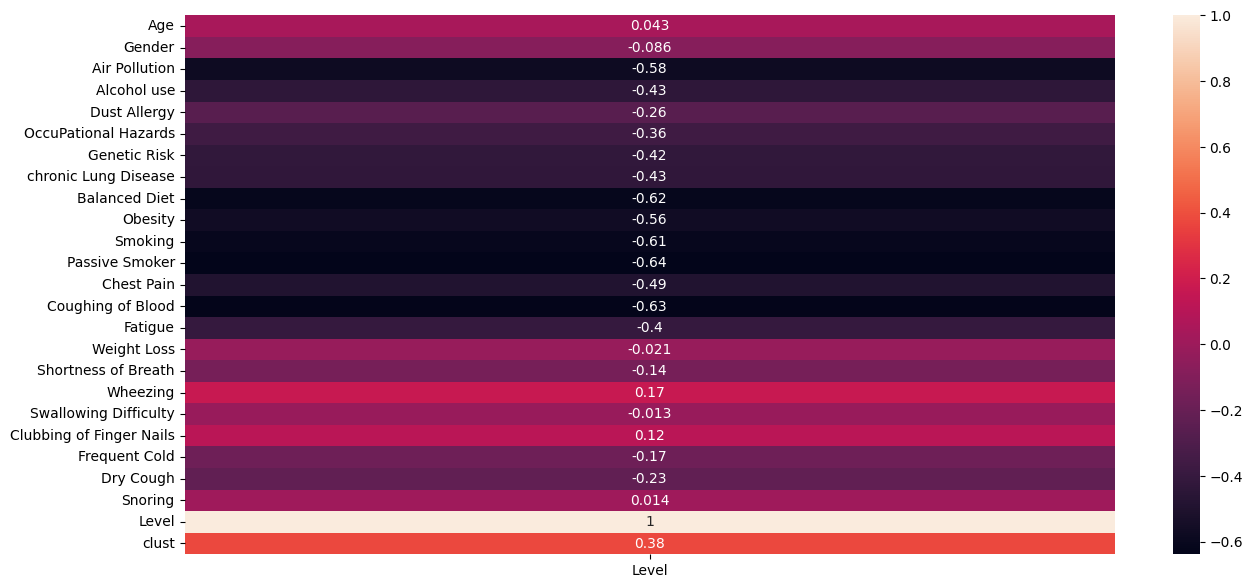

In [72]:
corrmap(df_canser2, "Level")

##  Классификация

### Предобработка

Делю данные на признаки и целевые значения

In [73]:
X = df_canser2.drop(["Level"], axis=1)
y = df_canser2["Level"]

In [74]:
X

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,clust
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,0
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,0
996,37,0,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,0
997,25,0,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,0,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,0


In [75]:
y

0      1
1      2
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: Level, Length: 1000, dtype: int64

Создаю обучающую и тестовую выборки

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

Масштабирую данные

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Обучение

#### RandomForestClassifier

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



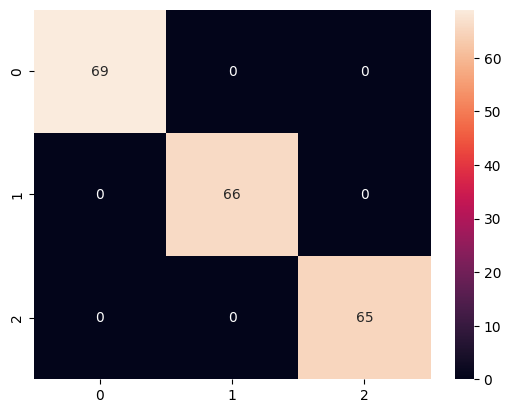

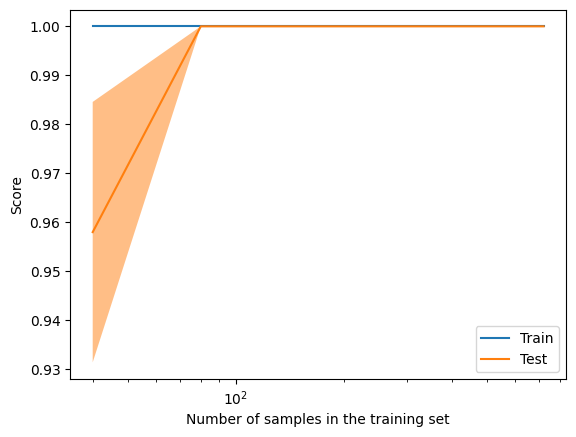

In [78]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_true = y_test
plt.show()
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
print(classification_report(y_true, y_pred))
LearningCurveDisplay.from_estimator(RandomForestClassifier(random_state=42), X, y, train_sizes=[0.05, 0.1, 0.2, 0.6,0.7,0.8,0.9])

#### AdaBoostClassifier

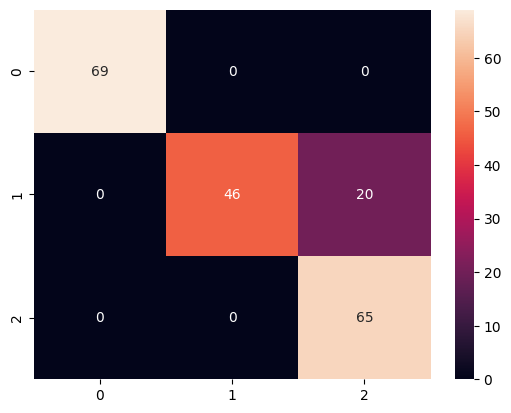

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      0.70      0.82        66
           2       0.76      1.00      0.87        65

    accuracy                           0.90       200
   macro avg       0.92      0.90      0.90       200
weighted avg       0.92      0.90      0.90       200



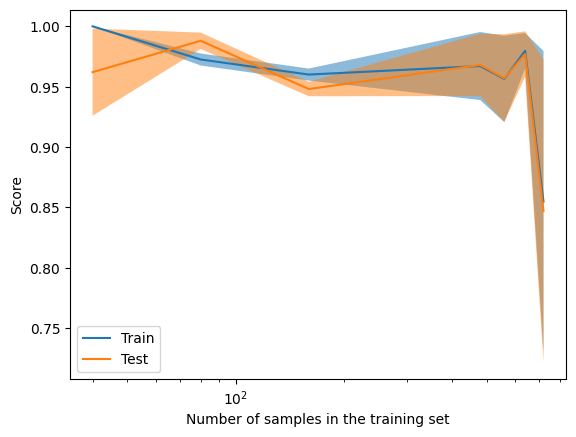

In [79]:
adc = AdaBoostClassifier(random_state=42, algorithm="SAMME")
adc.fit(X_train, y_train)
y_pred = adc.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
plt.show()
print(classification_report(y_true, y_pred))
LearningCurveDisplay.from_estimator(AdaBoostClassifier(random_state=42, algorithm="SAMME"), X, y, train_sizes=[0.05, 0.1, 0.2, 0.6,0.7,0.8,0.9])

#### ExtraTreesClassifier

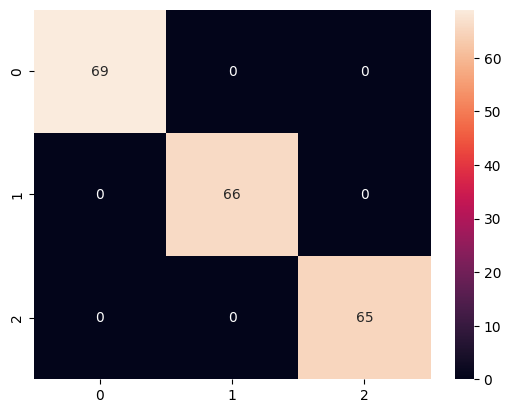

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



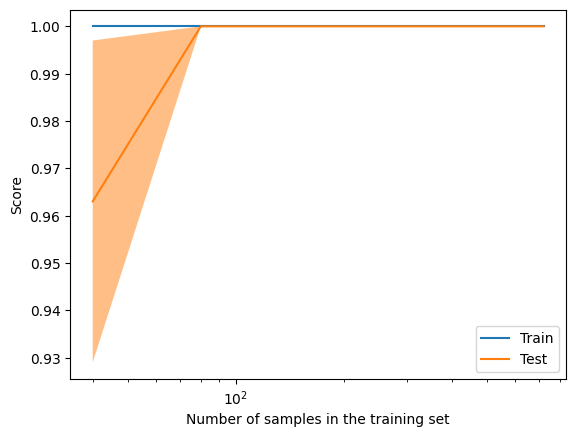

In [80]:
etc = ExtraTreesClassifier(random_state=42)
etc.fit(X_train, y_train)
y_pred = etc.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
plt.show()
print(classification_report(y_true, y_pred))
LearningCurveDisplay.from_estimator(ExtraTreesClassifier(random_state=42), X, y, train_sizes=[0.05, 0.1, 0.2, 0.6,0.7,0.8,0.9])

#### HistGradientBoostingClassifier

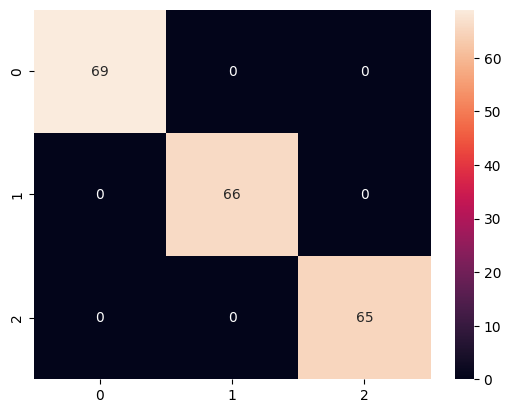

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



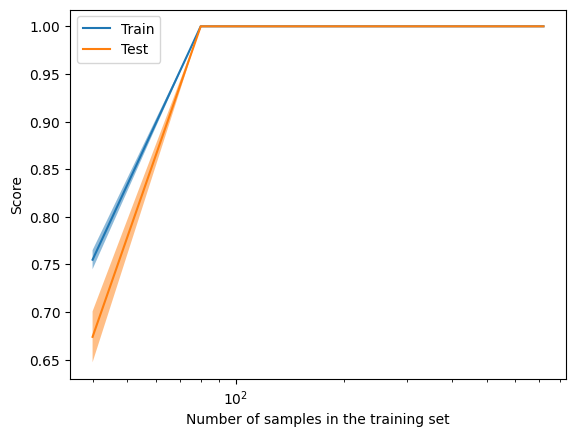

In [81]:
hgbc = HistGradientBoostingClassifier(random_state=42)
hgbc.fit(X_train, y_train)
y_pred = hgbc.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
plt.show()
print(classification_report(y_true, y_pred))
LearningCurveDisplay.from_estimator(HistGradientBoostingClassifier(random_state=42), X, y, train_sizes=[0.05, 0.1, 0.2, 0.6,0.7,0.8,0.9])

#### GradientBoostingClassifier

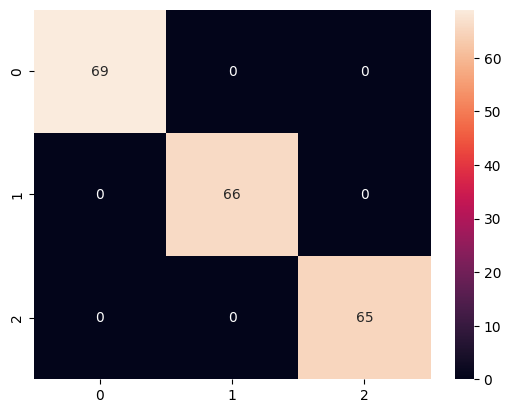

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00        65

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



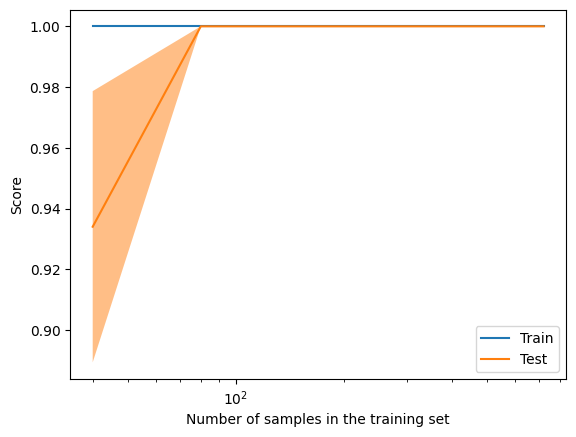

In [82]:
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
plt.show()
print(classification_report(y_true, y_pred))
LearningCurveDisplay.from_estimator(GradientBoostingClassifier(random_state=42), X, y, train_sizes=[0.05, 0.1, 0.2, 0.6,0.7,0.8,0.9])

#### PassiveAggressiveClassifier

In [83]:
from sklearn.linear_model import PassiveAggressiveClassifier

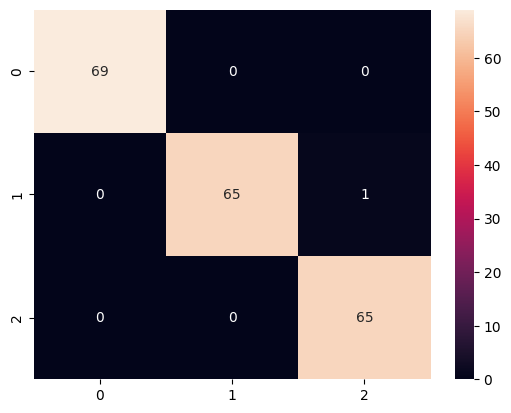

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       1.00      0.98      0.99        66
           2       0.98      1.00      0.99        65

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



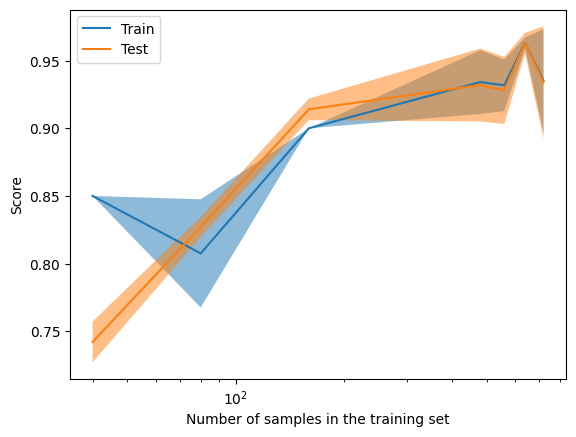

In [84]:
pac = PassiveAggressiveClassifier(random_state=42)
pac.fit(X_train, y_train)
y_pred = pac.predict(X_test)
y_true = y_test
sns.heatmap(confusion_matrix(y_true, y_pred),annot=True)
plt.show()
print(classification_report(y_true, y_pred))
LearningCurveDisplay.from_estimator(PassiveAggressiveClassifier(random_state=42), X, y, train_sizes=[0.05, 0.1, 0.2, 0.6,0.7,0.8,0.9])

### Классификация для предсказания кластеров

In [85]:
Xc = df_canser2.drop(["Level", "clust"], axis=1)
yc = df_canser2["clust"]

In [86]:
Xc

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
0,33,1,2,4,5,4,3,2,2,4,...,4,3,4,2,2,3,1,2,3,4
1,17,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
2,35,1,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
3,37,1,7,7,7,7,6,7,7,7,...,8,4,2,3,1,4,5,6,7,5
4,46,1,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,7,5,3,2,7,8,2,4,5,3
996,37,0,6,8,7,7,7,6,7,7,...,7,9,6,5,7,2,4,3,1,4
997,25,0,4,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2
998,18,0,6,8,7,7,7,6,7,7,...,9,3,2,4,1,4,2,4,2,3


In [93]:
yc

0      1
1      1
2      2
3      0
4      0
      ..
995    0
996    0
997    2
998    0
999    2
Name: clust, Length: 1000, dtype: int32

In [94]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc, yc, test_size=0.2, random_state=5)

In [95]:
scaler_cl = StandardScaler()
Xc_train = scaler_cl.fit_transform(Xc_train)
Xc_test = scaler_cl.transform(Xc_test)

In [96]:
rfc_c = RandomForestClassifier(random_state=42)
rfc_c.fit(Xc_train, yc_train)
yc_pred = rfc_c.predict(Xc_test)

<Axes: >

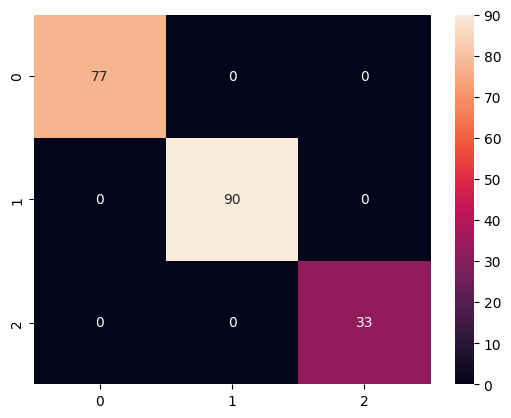

In [97]:
yc_true = yc_test
sns.heatmap(confusion_matrix(yc_true, yc_pred),annot=True)

In [98]:
print(classification_report(yc_true, yc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        33

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



### Вывод

Так как данные очень хорошо структурированы и имеют высокую корреляцию, модели предсказывают очень хорошо. Сказать, что они переобучились можно, но зная исходные данные, сложно

### Функция для полного круга предсказания данных вне блокнота

In [99]:
def pred(df, cl_cl, lev_cl, gender_en, level_en, scaler_cl, scaler):
    dd = df.copy()
    dd["Gender"] = gender_en.transform(dd["Gender"])
    print(dd["Gender"].unique())
    Xc = scaler_cl.transform(dd.drop(["Patient Id"], axis=1))
    dd["clust"] = cl_cl.predict(Xc)
    X = scaler.transform(dd.drop(["Patient Id"], axis=1))
    dd["Level"] = lev_cl.predict(X)
    dd.drop(["clust"], axis=1, inplace=True)
    dd["Gender"] = gender_en.inverse_transform(dd["Gender"])
    dd["Level"] = level_en.inverse_transform(dd["Level"])
    return dd


## Экспорт

In [100]:
import pickle

Экспорт кодировщиков

In [101]:
with open('label_encoder_gender.pickle', 'wb') as ecn_file:
    pickle.dump(gender_le, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)
with open('label_encoder_level.pickle', 'wb') as ecn_file:
    pickle.dump(level_che, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

Экспорт моделей

In [102]:
with open('model_rfc.pkl','wb') as f:
    pickle.dump(rfc,f)
with open('model_gbc.pkl','wb') as f:
    pickle.dump(gbc,f)
with open('model_hgbc.pkl','wb') as f:
    pickle.dump(hgbc,f)
with open('model_adc.pkl','wb') as f:
    pickle.dump(adc,f)
with open('model_etc.pkl','wb') as f:
    pickle.dump(etc,f)
with open('model_pac.pkl','wb') as f:
    pickle.dump(pac,f)

with open('model_rfc_clust.pkl','wb') as f:
    pickle.dump(rfc_c,f)

with open('scaler_clust.pkl','wb') as f:
    pickle.dump(scaler_cl,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)